In [22]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate

#cross validation
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.set_option('display.max_columns', None)

#warning handle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# Preprocessing and Data Analysis 

In [23]:
#Loading the data
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Working with Data

In [30]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
#Checking the shape of the dataset
data.shape

(8124, 23)

In [5]:
#Listing the features of the dataset
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [31]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [25]:
#missing values
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [28]:
M_cols = data.columns.to_list()
print("Value Distribution:\n")
for col in M_cols:
    print(col,"\n",data[col].value_counts(),"\n\n")

Value Distribution:

class 
 e    4208
p    3916
Name: class, dtype: int64 


cap-shape 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 


cap-surface 
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 


cap-color 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64 


bruises 
 f    4748
t    3376
Name: bruises, dtype: int64 


odor 
 n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64 


gill-attachment 
 f    7914
a     210
Name: gill-attachment, dtype: int64 


gill-spacing 
 c    6812
w    1312
Name: gill-spacing, dtype: int64 


gill-size 
 b    5612
n    2512
Name: gill-size, dtype: int64 


gill-color 
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 


stalk-shape 
 t  

## Data Visualization

Target plot
We will make a detailed plot for our target to get a clear idea of it's distribution:

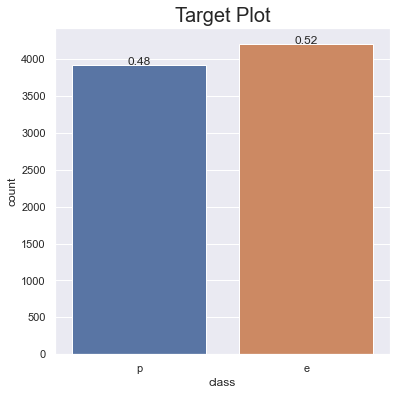

In [29]:
total = float(len(data[M_cols[0]]))
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(data[M_cols[0]])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center")
plt.title("Target Plot", fontsize = 20)
plt.show()

## Feature Engineering 

From the analysis above the following columns are not needed so we will drop them: gill-attachment, stalk-shape, stalk-surface-below-ring, stalk-color-below-ring, veil-type, veil-color, ring-number. so now we will create our feetures varable x excluding the mentioned columns:

In [33]:
Del_cols = ['class','gill-attachment', 'stalk-shape', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number'] 
X =data.copy()
for col in Del_cols:
    X = X.drop(col, axis = 1)
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head(2)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,stalk-surface-above-ring_k,stalk-surface-above-ring_s,stalk-surface-above-ring_y,stalk-color-above-ring_c,stalk-color-above-ring_e,stalk-color-above-ring_g,stalk-color-above-ring_n,stalk-color-above-ring_o,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [36]:
y = data['class']
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

# Machine learning models

Spliting dataset

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 101)

In [40]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

index = ['Valid1','Valid2','Valid3','Valid4','Valid5']
scoring = ['accuracy','precision', 'recall','f1']

# 1. Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [41]:
#model
LR = LogisticRegression()
#cross validation
LR_report = pd.DataFrame(cross_validate(LR, X, y, scoring=scoring))
#getting required score methods
LR_report = LR_report.iloc[:,2:]
#naming the columns
LR_report.columns = scoring
#naming the index
LR_report.index = index

#final result collection
model_1 = []

#Classification report
print("Clasification report:\n")
print(LR_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(LR_report[score].mean(),4)}")
    model_1.append(round(LR_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.896000   1.000000  0.784439  0.879199
Valid2  0.999385   1.000000  0.998723  0.999361
Valid3  0.973538   1.000000  0.945083  0.971766
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.862069   0.782038  0.989783  0.873732 


Mean Scores:

	accuracy: 0.9462
	precision: 0.9564
	recall: 0.9436
	f1: 0.9448


In [42]:
#sample prediction for csv file
LR.fit(X_train, y_train)#training
y_predict = LR.predict(X_test)#predicting
Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})#df for camparison
Logistic_Regression.to_csv("Logistic Regression.csv")#export to csv    

# Decision Tree

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [43]:
#model
DT = DecisionTreeClassifier()
#cross validation
DT_report = pd.DataFrame(cross_validate(DT, X, y, scoring=scoring))
#getting required score methods
DT_report = DT_report.iloc[:,2:]
#naming the columns
DT_report.columns = scoring
#naming the index
DT_report.index = index

#final result collection
model_2 = []
#Classification report
print("Clasification report:\n")
print(DT_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(DT_report[score].mean(),4)}")
    model_2.append(round(DT_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.842462   1.000000  0.673469  0.804878
Valid2  1.000000   1.000000  1.000000  1.000000
Valid3  1.000000   1.000000  1.000000  1.000000
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.724138   0.636068  1.000000  0.777557 


Mean Scores:

	accuracy: 0.9133
	precision: 0.9272
	recall: 0.9347
	f1: 0.9165


# Random Forest

Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [45]:
#model
RF = RandomForestClassifier()
#cross validation
RF_report = pd.DataFrame(cross_validate(RF, X, y, scoring=scoring))
#getting required score methods
RF_report = RF_report.iloc[:,2:]
#naming the columns
RF_report.columns = scoring
#naming the index
RF_report.index = index

#final result collection
model_3 = []

#Classification report
print("Clasification report:\n")
print(RF_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(RF_report[score].mean(),4)}")
    model_3.append(round(RF_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.842462   1.000000  0.673469  0.804878
Valid2  1.000000   1.000000  1.000000  1.000000
Valid3  1.000000   1.000000  1.000000  1.000000
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.871921   0.790111  1.000000  0.882751 


Mean Scores:

	accuracy: 0.9429
	precision: 0.958
	recall: 0.9347
	f1: 0.9375


In [46]:
#sample prediction for csv file
RF.fit(X_train, y_train)#training
y_predict = RF.predict(X_test)#predicting
Random_Forest = pd.DataFrame({'y_test':y_test,'prediction':y_predict})#df for camparison
Random_Forest.to_csv("Random Forest.csv")#export to csv 

# XGBoost

The Gradient Boosting Machine is a powerful ensemble machine learning algorithm that uses decision trees. Boosting is a general ensemble technique that involves sequentially adding models to the ensemble where subsequent models correct the performance of prior models. AdaBoost was the first algorithm to deliver on the promise of boosting.Machine Learning Models & Training

In [47]:
#model
XGB = XGBClassifier()
#cross validation
XGB_report = pd.DataFrame(cross_validate(XGB, X, y, scoring=scoring))
#getting required score methods
XGB_report = XGB_report.iloc[:,2:]
#naming the columns
XGB_report.columns = scoring
#naming the index
XGB_report.index = index
#final result collection
model_4 = []

#Classification report
print("Clasification report:\n")
print(XGB_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(XGB_report[score].mean(),4)}")
    model_4.append(round(XGB_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.842462   1.000000  0.673469  0.804878
Valid2  1.000000   1.000000  1.000000  1.000000
Valid3  0.997538   1.000000  0.994891  0.997439
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.898399   0.829424  0.993614  0.904126 


Mean Scores:

	accuracy: 0.9477
	precision: 0.9659
	recall: 0.9324
	f1: 0.9413


In [48]:
#sample prediction for csv file
XGB.fit(X_train, y_train)#training
y_predict = XGB.predict(X_test)#predicting
XGBoost=pd.DataFrame({'y_test':y_test,'prediction':y_predict})#df for camparison
XGBoost.to_csv("XGBoost.csv")#export to csv   

# Support Vector Machines

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis 

In [49]:
#model
SVM = SVC(kernel = 'linear')
#cross validation
SVM_report = pd.DataFrame(cross_validate(SVM, X, y, scoring=scoring))
#getting required score methods
SVM_report = SVM_report.iloc[:,2:]
#naming the columns
SVM_report.columns = scoring
#naming the index
SVM_report.index = index

#final result collection
model_5 = []
#Classification report
print("Clasification report:\n")
print(SVM_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(SVM_report[score].mean(),4)}")
    model_5.append(round(SVM_report[score].mean(),4))
    

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.842462   1.000000  0.673469  0.804878
Valid2  1.000000   1.000000  1.000000  1.000000
Valid3  0.995692   1.000000  0.991060  0.995510
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.805419   0.715605  0.989783  0.830654 


Mean Scores:

	accuracy: 0.9287
	precision: 0.9431
	recall: 0.9309
	f1: 0.9262


In [50]:
#sample prediction for csv file
SVM.fit(X_train, y_train)#training
y_predict = SVM.predict(X_test)#predicting
Support_Vector_Machines=pd.DataFrame({'y_test':y_test,'prediction':y_predict})#df for camparison
Support_Vector_Machines.to_csv("Support Vector Machines.csv")#export to csv     

# conclusion

In [51]:
Models = pd.DataFrame({
    'Logistic Regression': np.array(model_1),
    'Decision Tree': np.array(model_2),
    'Random Forest': np.array(model_3),
    'XGBoost': np.array(model_4),
    'Support Vector Machines': np.array(model_5)})
Models.index = scoring
#Models.sort_values(by='Score', ascending=False)
Models

,Logistic Regression,Decision Tree,Random Forest,XGBoost,Support Vector Machines
accuracy,0.9462,0.9133,0.9429,0.9477,0.9287
precision,0.9564,0.9272,0.9580,0.9659,0.9431
recall,0.9436,0.9347,0.9347,0.9324,0.9309
f1,0.9448,0.9165,0.9375,0.9413,0.9262
